<a href="https://colab.research.google.com/github/seawavve/Wanted-Pre-Onboarding-AIML/blob/main/tmp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Install

In [35]:
! pip install transformers

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data

In [37]:
import json
with open('drive/MyDrive/onboarding/jd_7632.json','r') as file:
  data=json.load(file)

In [38]:
for wd in data[:10]:
  print(wd)

{'wd_id': 61852, 'position': '고객 경험(CX) 전략 매니저 (신입/인턴)', 'main_tasks': '• 24시간 365일 운영되는 로켓펀치와 집무실 고객 경험 관리\n• 고객 경험 사이클을 모니터링 및 개선하기 위한 전략 수립 및 운영 Support\n• 11 star experience를 달성하기 위한 고객 경험 설계 Support\n(참고: 11 star experience https://www.disquiet.tech/post/11-star-framework-01 )', 'requirements': '• 소셜 네트워크 또는 플랫폼 커뮤니티 등 온라인 플랫폼 운영에 관심이 있으신 분\n• 온라인 결제 시스템 운영에 관심이 있으신 분\n• Google Spreadsheet 등을 활용하여 숫자와 데이터를 다루는데 익숙하신 분\n• 고객의 니즈와 이슈를 빠르게 파악하고 해결책을 찾아낼 수 있는 능력\n• 시스템 운영, 관리, 개선을 주도적으로 할 수 있는 분\n• 구글 워크스페이스, 슬랙 등 업무 및 협업 도구 활용 능력', 'preferred_points': '• 회사와 함께 성장하고자 하는 의지를 가진 분\n• 다양한 이슈에 빠르게 대응하고 해결하실 수 있는 분', 'category': '경영, 비즈니스'}
{'wd_id': 61851, 'position': '집무실 IoT 개발자', 'main_tasks': '• 집무실 인프라 구축: (IoT)전원 관리 설계 및 구성, QR 코드 기반 출입 제어 설계 및 구성, 내부 네트워크 설계/구축/관리, IP Camera를 통한 영상 분석 등 집무실에서 사용하는 모든 네트워크 및 IoT 인프라 구축\n• 자동화 관리: 구축된 인프라를 바탕으로한 집무실 공간 자동화 설계 및 구성\n\n• 현재 집무실에서는 이미 QR코드를 통해 출입을 제어하고 네트워크 및 전원 등을 리모트로 관리하고 있습니다. 이런 집무실의 인프라들을 구축하고 관리하게 됩니다.\n• 인프라중 직접 제어가 필요한 경우 개발을 

In [39]:
# 데이터 총 개수
len(data)

7632

In [40]:
# 카테고리 총 4개 
list_category=[]
for wd in data:
  list_category.append(wd['category'])
set_category=set(list_category)
print(set_category)

{'경영, 비즈니스', '개발', '디자인', '마케팅, 광고'}


In [60]:
from pandas import json_normalize
df = json_normalize(data)
df.replace({'category': {'경영, 비즈니스':0,
            '개발':1,
            '디자인':2,
            '마케팅, 광고':3}
}, inplace=True)
df.head()

,wd_id,position,main_tasks,requirements,preferred_points,category
0,61852,고객 경험(CX) 전략 매니저 (신입/인턴),• 24시간 365일 운영되는 로켓펀치와 집무실 고객 경험 관리\n• 고객 경험 사...,• 소셜 네트워크 또는 플랫폼 커뮤니티 등 온라인 플랫폼 운영에 관심이 있으신 분\...,• 회사와 함께 성장하고자 하는 의지를 가진 분\n• 다양한 이슈에 빠르게 대응하고...,0
1,61851,집무실 IoT 개발자,"• 집무실 인프라 구축: (IoT)전원 관리 설계 및 구성, QR 코드 기반 출입 ...",• IoT를 통한 공간 관리 및 자동화에 대한 높은 관심이 있어야 합니다.\n• ...,• 적극적으로 서비스 개선에 필요한 업무를 찾고 개선할수 있는 인성과 역량\n• ...,1
2,61850,공간(인테리어) 디자이너,"- 공간 아이덴티티 : 숙박시설, 공용공간, 객실 등 공간의 아이덴티티를 기획하고 ...","• 여행, 숙박업, 접객업, 프랜차이즈업에 대한 경험과 이해\n• CAD, Sket...",• 숙박 운영 및 관리를 경험하신 분\n• 시니어 디자이너와 팀을 이뤄 프로젝트...,2
3,61849,Python 웹 어플리케이션 개발자,• 로켓펀치 웹 서비스 개발,• 웹 개발 업무 2년 이상이 있어야 합니다.\n• Python 및 Django/F...,• 적극적으로 서비스 개선에 필요한 업무를 찾고 개선할수 있는 인성과 역량\n• S...,1
4,61848,여행 숙박 콘텐츠 마케터,• 투숙고객 대상 브랜딩-프로모션-예약-투숙-후기를 아우르는 일관된 마케팅 캠페인 ...,"• 2~5년간 미디어, PR, 광고, 콘텐츠 기획/제작을 경험하신 분\n• 복잡...","• 숙박운영, 스타트업 업무문화 경험자\n• 유튜브, 브런치 등 뉴미디어를 다양하...",3


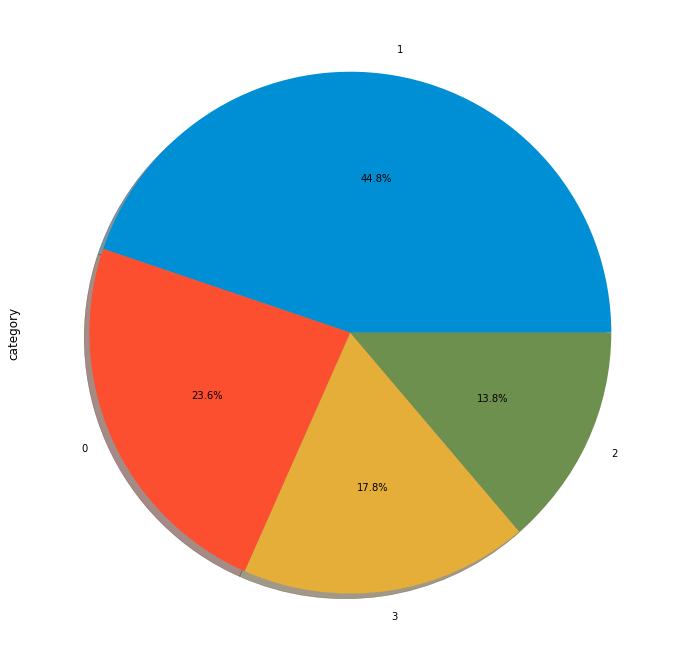

In [57]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

f,ax=plt.subplots(1,figsize=(18,12))
df['category'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)

### Tokenizer

In [41]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name="bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [65]:
print(df['main_tasks'][0])
text = df['main_tasks'][0]
tokenized_input_text = tokenizer(text, return_tensors='pt')
for key, value in tokenized_input_text.items():
  print(key,value)

• 24시간 365일 운영되는 로켓펀치와 집무실 고객 경험 관리
• 고객 경험 사이클을 모니터링 및 개선하기 위한 전략 수립 및 운영 Support
• 11 star experience를 달성하기 위한 고객 경험 설계 Support
(참고: 11 star experience https://www.disquiet.tech/post/11-star-framework-01 )
input_ids tensor([[   101,   1729,  10233, 100699,  25385,  18392,  91988,  24683,   9202,
         119304, 119387,  18622,  12638,   9711,  32537,  31503,   8888, 118617,
           8885,  86834,   8900,  12692,   1729,   8888, 118617,   8885,  86834,
           9405,  10739, 119327,  10622,   9283,  25503,  21876,  80174,   9316,
           8857,  18471,  22440,  28195,   9665, 118863,   9460,  35115,   9316,
          91988,  39007,   1729,  10193,  16624,  20627,  11513,   9061,  17138,
          22440,  28195,   8888, 118617,   8885,  86834,   9429,  21611,  39007,
            113,   9735,  11664,    131,  10193,  16624,  20627,  14120,    131,
            120,    120,  10494,    119,  27920,  39639,  10308,    119, 100986,
            120,  11841,    120,  10193,    118,  166

In [43]:
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)
input_ids = tokenizer.encode(text)
print(input_ids)
decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids)

['24', '##시간', '365', '##일', '운영', '##되는', '로', '##켓', '##펀', '##치', '##와', '집', '##무', '##실', '고', '##객', '경', '##험', '관', '##리']
[101, 10233, 100699, 25385, 18392, 91988, 24683, 9202, 119304, 119387, 18622, 12638, 9711, 32537, 31503, 8888, 118617, 8885, 86834, 8900, 12692, 102]
[CLS] 24시간 365일 운영되는 로켓펀치와 집무실 고객 경험 관리 [SEP]


### Model

In [45]:
inputs =  tokenizer('안녕 월드 내가 왔어',return_tensors='pt')
outputs = model(**inputs)